## David Saavedra Fernández

## Importación de librerías

In [1]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

## Importación del dataset

In [43]:
# Cargar el dataset Bank Marketing
original_df = pd.read_csv("https://raw.githubusercontent.com/dsf0211/Actividad_4_1_Segmentacion_de_clientes_segun_datos_bancarios_David_Saavedra_Fernandez/refs/heads/main/bank.csv", sep=';')
df = original_df.copy()

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Análisis

In [28]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4521   │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column       ┃ NA   ┃ NA %   ┃ mean      ┃ sd       ┃ p0       ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age          │    0 │      0 │     41.17 │    10.58 │       19 │    33 │    39 │     49 │     87 │  ▃█▅▃   │  │
│ │ balance      │    0 │      0 │      1423 │     3010 │    -3313 │    69 │   444 │   1480 │  71190 │    █    │  │
│ │ day          │    0 │      0 │     15.92 │    8.248 │        1 │     9 │    16 │     21 │     31 │ ▄▆▆█▄▆  │  │
│ │ duration     │    0 │      0 │       264 │    259.9 │        4 │   104 │   185 │    329 │   3025 │   █▁    │  │
│ │ campaign     │    0 │      0 │     2.794 │     3.11 │        1 │     1 │     2 │      3 │     50 │    █    │  │
│ │ pdays        │    0 │      0 │     39.77 │    100.1 │       -1 │    -1 │    -1 │     -1 │    871 │   █▁    │  │
│ │ previous     │    0 │      0 │    0.5426 │    1.694 │        0 │     0 │     0 │      0 │     25 │    █    │  │
│ └──────────────┴──────┴────────┴───────────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃            ┃          ┃         ┃ chars per  ┃ words per   ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min      ┃ max     ┃ row        ┃ row         ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ job       │  0 │    0 │ admin.   │ self-emplo │ admin.   │ unknown │       9.54 │           1 │       4521 │  │
│ │           │    │      │          │ yed        │          │         │            │             │            │  │
│ │ marital   │  0 │    0 │ single   │ divorced   │ divorced │ single  │       6.85 │           1 │       4521 │  │
│ │ education │  0 │    0 │ primary  │ secondary  │ primary  │ unknown │       8.32 │           1 │       4521 │  │
│ │ default   │  0 │    0 │ no       │ yes        │ no       │ yes     │       2.02 │           1 │       4521 │  │
│ │ housing   │  0 │    0 │ no       │ yes        │ no       │ yes     │       2.57 │           1 │       4521 │  │
│ │ loan      │  0 │    0 │ no       │ yes        │ no       │ yes     │       2.15 │           1 │       4521 │  │
│ │ contact   │  0 │    0 │ unknown  │ telephone  │ cellular │ unknown │       7.77 │           1 │       4521 │  │
│ │ month     │  0 │    0 │ oct      │ oct        │ apr      │ sep     │          3 │           1 │       4521 │  │
│ │ poutcome  │  0 │    0 │ other    │ unknown    │ fail

## Selección de características

In [29]:
# Eliminación de columnas menos relevantes
df = df.drop(['day', 'month', 'pdays', 'contact'], axis= 1)
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,79,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,220,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,185,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,199,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,329,5,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,153,1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,151,11,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,129,4,3,other,no


## Normalización

In [30]:
# Transformar las columnas categóricas a numéricas
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,79,1,0,3,0
1,33,7,1,1,0,4789,1,1,220,1,4,0,0
2,35,4,2,2,0,1350,1,0,185,1,1,0,0
3,30,4,1,2,0,1476,1,1,199,4,0,3,0
4,59,1,1,1,0,0,1,0,226,1,0,3,0


In [32]:
# Escalamiento
min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df_scaled

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.16      , 0.        ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.04      , 0.        ,
        0.        ],
       ...,
       [0.55882353, 0.81818182, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.13235294, 0.09090909, 0.5       , ..., 0.12      , 0.33333333,
        0.        ],
       [0.36764706, 0.18181818, 1.        , ..., 0.28      , 0.33333333,
        0.        ]])

## Aplicación de PCA

In [33]:
# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df_scaled)

# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df.columns)

[0.28626439 0.15293585]


,PC-1,PC-2
age,-0.060716,0.027740
job,-0.120025,-0.113084
marital,-0.027931,-0.161665
education,-0.064212,-0.112225
default,0.001711,0.026716
balance,-0.004379,-0.008626
housing,0.976950,-0.062457
loan,0.038696,0.874991
duration,-0.002052,-0.026808
campaign,-0.000715,0.010742


## Averiguar mejor número de clusters con K-Means y Silhouette Score

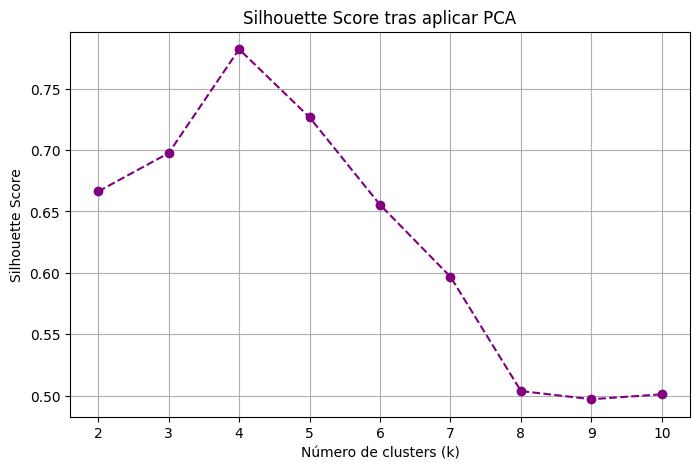

In [34]:
silhouette_scores = {}
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score

# Visualizar Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores.values(), marker='o', linestyle='--', color='purple')
plt.title("Silhouette Score tras aplicar PCA")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [35]:
# Obtener mejor Silhouette Score
best_silhouette_score = max(silhouette_scores.values())
print("Mejor puntuación de Silhouettte: ", best_silhouette_score)

Mejor puntuación de Silhouettte:  0.7819929099348369


In [36]:
# Obtener mejor número de clusters
for k, score in silhouette_scores.items():
    if score == best_silhouette_score:
        n_clusters = k
        break
print("Mejor número de clusters: ", n_clusters)

Mejor número de clusters:  4


## Obtener etiquetas de clusters

In [37]:
# Obtener etiquetas tras aplicar mejor número de clusters
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_pca)

# Mostrar etiquetas
print("Etiquetas de los clusters: ", cluster_labels)

Etiquetas de los clusters:  [0 3 1 ... 0 0 3]


## Visualizar clusters

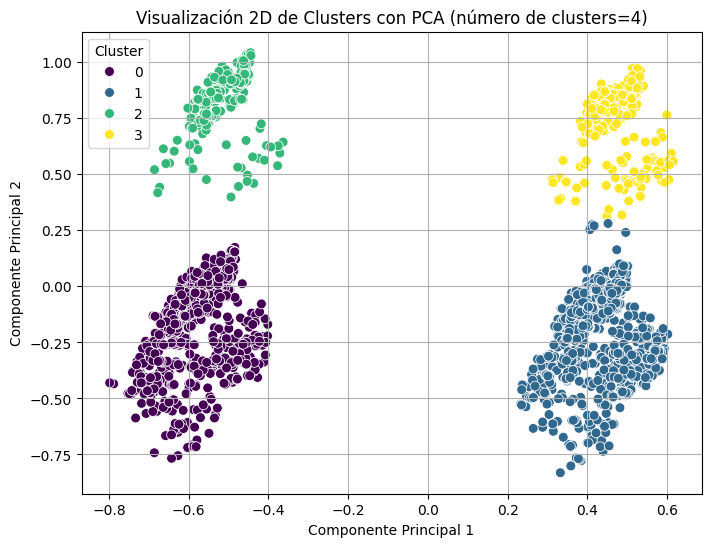

In [38]:
# Visualización de los clusters en 2D
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)
    plt.title(f"Visualización 2D de Clusters con PCA (número de clusters={n_clusters})")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

## Exportar el resultado

In [39]:
# Añadir resultados al DataFrame original
original_df['cluster'] = cluster_labels
original_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,3
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,3
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1


In [40]:
# Exportar el resultado
pd.DataFrame(original_df).to_csv('bank_final.csv', index=False)

In [42]:
# Descargar el resultado
files.download('bank_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>